In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./clean_ds.xlsx")

all_cols: list[str] = df.columns.tolist()
target: str = "referred_CXL"

## Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1024 non-null   int64  
 1   Atopy            1024 non-null   int64  
 2   EXAM             1024 non-null   int64  
 3   atopy_dummy      1024 non-null   int64  
 4   kMax             1024 non-null   float64
 5   PachyMin         1024 non-null   float64
 6   ak1              1024 non-null   float64
 7   ak2              1024 non-null   float64
 8   KmF              1024 non-null   float64
 9   Axis_F_(flat)    1024 non-null   float64
 10  Astig_F_(D)      1024 non-null   float64
 11  R_Per_F_(mm)     1024 non-null   float64
 12  Rmin             1024 non-null   float64
 13  Num_Ecc_F        1024 non-null   float64
 14  Asph_Q_F         1024 non-null   float64
 15  Rf_B_(mm)        1024 non-null   float64
 16  Rs_B_(mm)        1024 non-null   float64
 17  Rh_B_(mm)     

## Gender distribution

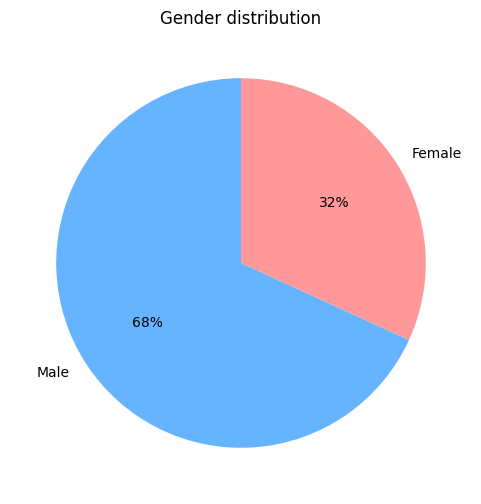

In [4]:
plt.figure(figsize=(6,6))
counts = df["Gender"].value_counts()
labels = ["Female" if x == 0 else "Male" for x in counts.index]
colors = ['#ff9999' if x == 0 else '#66b3ff' for x in counts.index]

plt.pie(x=counts.values,          # type: ignore
        labels=labels,
        autopct="%.0f%%",
        startangle=90,
        colors=colors
        )

plt.title("Gender distribution")
plt.show()

## Age distribution

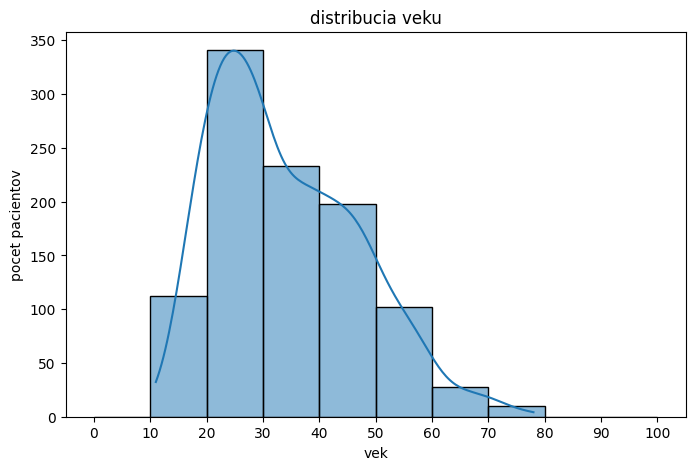

In [5]:
bins = list(range(0, 101, 10))

plt.figure(figsize=(8, 5))
sns.histplot(df["age"],         # type: ignore
             bins=bins,
             edgecolor="black",
             kde=True
             )
plt.xlabel("vek")
plt.ylabel("pocet pacientov")
plt.title("distribucia veku")
plt.xticks(bins)
plt.show()

## Korelacia medzi predikovanou premennou a atributami
- Heatmap-a nepripada do uvahy, mame vela atributov = bola by necitatelna

In [6]:
corr = (
    df
    .corr(method="spearman")[target]
    .drop(target)
    .sort_values(key=abs, ascending=False)
)


In [7]:
corr

age               -0.460034
EXAM               0.403602
D8mm_Prog          0.225062
D10mm_Prog         0.209167
R_Per_F_(mm)       0.202094
IHD                0.201684
Pachy_Min_Pos_Y    0.186882
D2mm_Prog          0.184217
atopy_dummy        0.167290
D4mm_Prog          0.166563
Rmin_B            -0.166483
D6mm_Prog          0.164765
ISV                0.154223
Pachy_Apex        -0.149500
IVA                0.145948
KI                 0.140661
D10mm_Pachy        0.138746
kMax               0.131329
PachyMin          -0.131229
Rmin              -0.129114
D0mm_Pachy        -0.128817
CKI                0.128342
RSagMin           -0.122182
Astig_F_(D)        0.121637
Asph_Q_F          -0.119628
C_Vol_D_3mm       -0.114444
Rv_B_(mm)         -0.111412
Astig_B_(D)        0.108326
D2mm_Pachy        -0.108270
pk2               -0.102298
Rs_B_(mm)         -0.101510
IHA                0.091750
C_Vol_D_5mm       -0.082655
Num_Ecc_F          0.080524
Km_B_(mm)         -0.077475
Rm_B_(mm)         -0

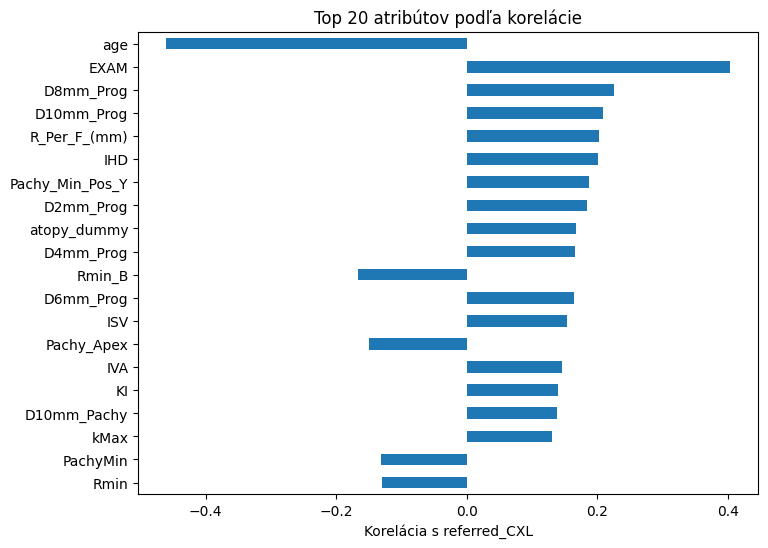

In [8]:
corr.head(20).plot(
    kind="barh",
    figsize=(8,6)
)

plt.xlabel("Korelácia s referred_CXL")
plt.title("Top 20 atribútov podľa korelácie")
plt.gca().invert_yaxis()
plt.show()
